<a href="https://colab.research.google.com/github/matsudo840/nlp100/blob/master/Chap4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 言語処理100本ノック 2015

## 第4章: 形態素解析
夏目漱石の小説『吾輩は猫である』の文章（neko.txt）をMeCabを使って形態素解析し，その結果をneko.txt.mecabというファイルに保存せよ．このファイルを用いて，以下の問に対応するプログラムを実装せよ．

なお，問題37, 38, 39はmatplotlibもしくはGnuplotを用いるとよい．

In [37]:
!wget http://www.cl.ecei.tohoku.ac.jp/nlp100/data/neko.txt
!apt install aptitude
!aptitude install mecab libmecab-dev mecab-ipadic-utf8 git make curl xz-utils file -y
!pip install mecab-python3==0.7

--2019-05-20 07:07:38--  http://www.cl.ecei.tohoku.ac.jp/nlp100/data/neko.txt
Resolving www.cl.ecei.tohoku.ac.jp (www.cl.ecei.tohoku.ac.jp)... 130.34.192.83
Connecting to www.cl.ecei.tohoku.ac.jp (www.cl.ecei.tohoku.ac.jp)|130.34.192.83|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 965825 (943K) [text/plain]
Saving to: ‘neko.txt.2’

neko.txt.2          100%[===================>] 943.19K   974KB/s    in 1.0s    

2019-05-20 07:07:40 (974 KB/s) - ‘neko.txt.2’ saved [965825/965825]

Reading package lists... Done
Building dependency tree       
Reading state information... Done
aptitude is already the newest version (0.8.10-6ubuntu1).
0 upgraded, 0 newly installed, 0 to remove and 7 not upgraded.
mecab is already installed at the requested version (0.996-5)
libmecab-dev is already installed at the requested version (0.996-5)
mecab-ipadic-utf8 is already installed at the requested version (2.7.0-20070801+main-1)
git is already installed at the requested version (1

In [0]:
import MeCab

In [0]:
tagger = MeCab.Tagger()

with open('neko.txt', 'r') as f:
  neko_mecab = tagger.parse(f.read())

with open('neko.txt.mecab', 'w', encoding='utf-8') as g:
   g.write(neko_mecab)


In [40]:
!head -20 neko.txt.mecab

一	名詞,数,*,*,*,*,一,イチ,イチ
　	記号,空白,*,*,*,*,　,　,　
吾輩	名詞,代名詞,一般,*,*,*,吾輩,ワガハイ,ワガハイ
は	助詞,係助詞,*,*,*,*,は,ハ,ワ
猫	名詞,一般,*,*,*,*,猫,ネコ,ネコ
で	助動詞,*,*,*,特殊・ダ,連用形,だ,デ,デ
ある	助動詞,*,*,*,五段・ラ行アル,基本形,ある,アル,アル
。	記号,句点,*,*,*,*,。,。,。
名前	名詞,一般,*,*,*,*,名前,ナマエ,ナマエ
は	助詞,係助詞,*,*,*,*,は,ハ,ワ
まだ	副詞,助詞類接続,*,*,*,*,まだ,マダ,マダ
無い	形容詞,自立,*,*,形容詞・アウオ段,基本形,無い,ナイ,ナイ
。	記号,句点,*,*,*,*,。,。,。
　	記号,空白,*,*,*,*,　,　,　
どこ	名詞,代名詞,一般,*,*,*,どこ,ドコ,ドコ
で	助詞,格助詞,一般,*,*,*,で,デ,デ
生れ	動詞,自立,*,*,一段,連用形,生れる,ウマレ,ウマレ
た	助動詞,*,*,*,特殊・タ,基本形,た,タ,タ
か	助詞,副助詞／並立助詞／終助詞,*,*,*,*,か,カ,カ
とんと	副詞,一般,*,*,*,*,とんと,トント,トント


### 30. 形態素解析結果の読み込み
形態素解析結果（neko.txt.mecab）を読み込むプログラムを実装せよ．ただし，各形態素は表層形（surface），基本形（base），品詞（pos），品詞細分類1（pos1）をキーとするマッピング型に格納し，1文を形態素（マッピング型）のリストとして表現せよ．第4章の残りの問題では，ここで作ったプログラムを活用せよ．

In [0]:
import re

sentence = []
sentences = []

with open('neko.txt.mecab', 'r') as f:
  for rows in f:
    columns = re.split('[\t,]', rows.rstrip())
    if len(columns) >= 8:
      if columns[2] == '空白':
        sentences.append(sentence)
        sentence = []
      else:
        morpheme = {
                  'surface': columns[0],
                  'base': columns[7],
                  'pos': columns[1],
                  'pos1': columns[2]
              }
        sentence.append(morpheme)

### 31. 動詞
動詞の表層形をすべて抽出せよ．

In [0]:
from itertools import chain

verbs_surface = []
for m in chain.from_iterable(sentences):
  if m['pos'] == '動詞':
    verbs_surface.append(m['surface'])

In [43]:
verbs_surface[:10]

['生れ', 'つか', 'し', '泣い', 'し', 'いる', '始め', '見', '聞く', '捕え']

### 32. 動詞の原形
動詞の原形をすべて抽出せよ．


In [0]:
from itertools import chain

verbs_base = []
for m in chain.from_iterable(sentences):
  if m['pos'] == '動詞':
    verbs_base.append(m['base'])

In [45]:
verbs_base[:10]

['生れる', 'つく', 'する', '泣く', 'する', 'いる', '始める', '見る', '聞く', '捕える']

### 33. サ変名詞
サ変接続の名詞をすべて抽出せよ．

In [0]:
from itertools import chain

nouns_sa = []
for m in chain.from_iterable(sentences):
  if m['pos'] == '名詞' and m['pos1'] == 'サ変接続':
    nouns_sa.append(m['base'])

In [47]:
nouns_sa[:10]

['見当', '記憶', '話', '装飾', '突起', '運転', '記憶', '分別', '決心', '我慢']

### 34. 「AのB」
2つの名詞が「の」で連結されている名詞句を抽出せよ．

In [0]:
n_no_n = []
for sentence in sentences:
  for w1, w2, w3 in zip(sentence[0:], sentence[1:], sentence[2:]):
    if w1['pos'] == '名詞' and w2['surface'] == 'の' and w3['pos'] == '名詞':
      n_no_n.append(w1['surface'] + w2['surface'] + w3['surface'])

In [49]:
n_no_n[:10]

['彼の掌', '掌の上', '書生の顔', 'はずの顔', '顔の真中', '穴の中', '書生の掌', '掌の裏', '何の事', '肝心の母親']

### 35. 名詞の連接
名詞の連接（連続して出現する名詞）を最長一致で抽出せよ．

In [0]:
long_nouns = []

for sentence in sentences:
  cnt = 0
  long_noun = ''
  
  for w in sentence:
    if w['pos'] == '名詞':
      cnt += 1
      long_noun += w['surface']
    else:
      if cnt >= 2:
        long_nouns.append(long_noun)
      cnt = 0
      long_noun = ''


In [51]:
long_nouns[:10]

['人間中', '一番獰悪', '時妙', '一毛', 'その後猫', '一度', 'ぷうぷうと煙', '邸内', '三毛', '書生以外']

### 36. 単語の出現頻度
文章中に出現する単語とその出現頻度を求め，出現頻度の高い順に並べよ．

In [0]:
from collections import defaultdict
from itertools import chain

d = defaultdict(int)

for m in chain.from_iterable(sentences):
  d[m['base']] += 1

d_sorted = sorted(d.items(), key=lambda x:x[1], reverse=True)

In [53]:
d_sorted[:10]

[('の', 9187),
 ('。', 7474),
 ('て', 6850),
 ('、', 6769),
 ('は', 6419),
 ('に', 6263),
 ('を', 6068),
 ('だ', 5973),
 ('と', 5515),
 ('が', 5338)]

### 37. 頻度上位10語
出現頻度が高い10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．

In [0]:
names = [x[0] for x in d_sorted[:10]]
values = [x[1] for x in d_sorted[:10]]

In [55]:
!pip install japanize-matplotlib

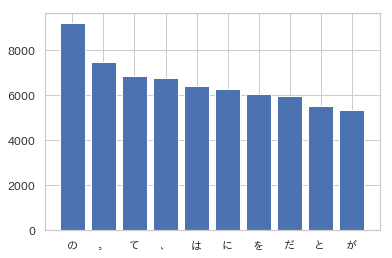

In [56]:
import matplotlib.pyplot as plt
import japanize_matplotlib

plt.bar(names, values)
plt.show()

### 38. ヒストグラム
単語の出現頻度のヒストグラム（横軸に出現頻度，縦軸に出現頻度をとる単語の種類数を棒グラフで表したもの）を描け．

### 39. Zipfの法則
単語の出現頻度順位を横軸，その出現頻度を縦軸として，両対数グラフをプロットせよ．